In [15]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns 
wine1=pd.read_csv('D:\Codes\python\wine reviews\winemag-data_first150k.csv')
wine2=pd.read_csv('D:\Codes\python\wine reviews\winemag-data-130k-v2.csv')
#两个表的数据类型是一致的，合并两个表
wine=pd.concat([wine1,wine2],ignore_index=True,sort=False)
wine=wine.drop(labels='Unnamed: 0',axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
country                  280833 non-null object
description              280901 non-null object
designation              197701 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null object
region_1                 234594 non-null object
region_2                 111464 non-null object
variety                  280900 non-null object
winery                   280901 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [16]:
wine.duplicated().value_counts()


False    217839
True      63062
dtype: int64

In [17]:
wine=wine.drop_duplicates()
#进一步检查，发现存在很多字段都重复的数据，认为是重复数据并将其清除
dupilicated_index=list(wine[wine[['country','description','designation','province','points','price']].duplicated()].index)
wine=wine.drop(labels=dupilicated_index,axis=0)
wine.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169512,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
169513,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
169514,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
169515,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


`葡萄酒的种类`

`种类总体分布`

Text(0, 0.5, 'Quantity')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


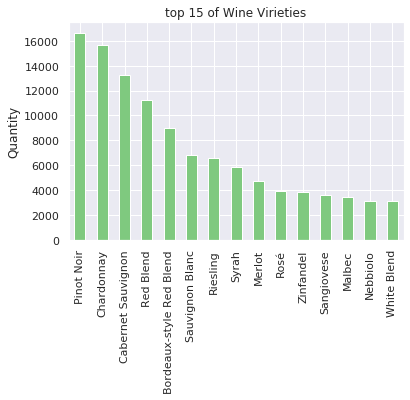

In [18]:
temp=wine.variety.value_counts()[0:15]
ax=temp.plot(kind='bar',title='top 15 of Wine Virieties',colormap='Accent')
plt.ylabel('Quantity',fontsize=12)


数量最多的葡萄酒种类有Pinot Noir 、Chardonnay 、Cabernet Sauvignon等等

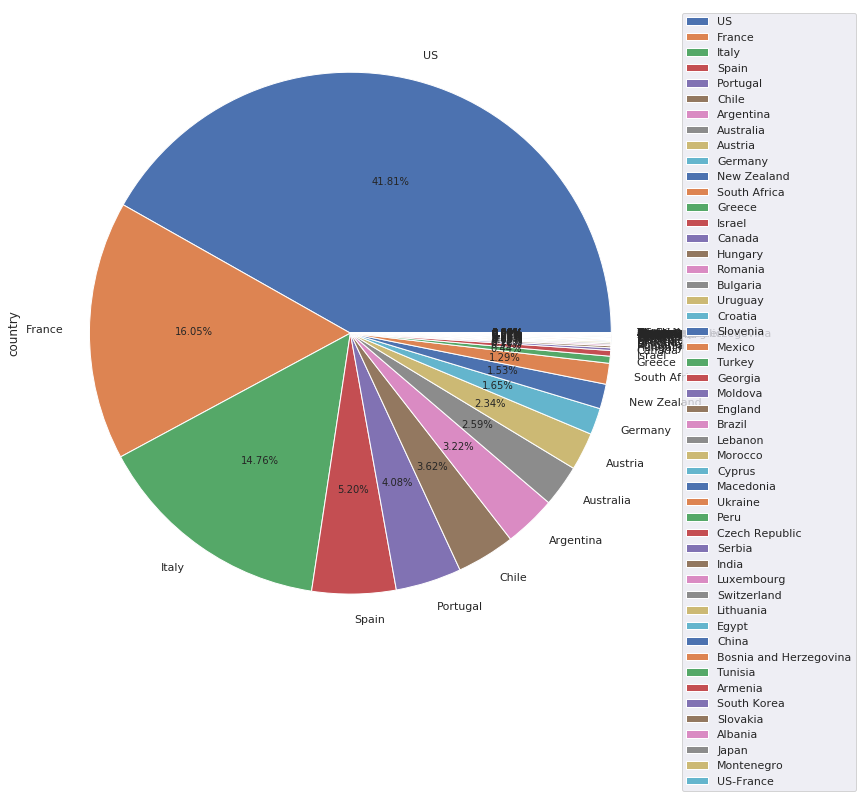

In [19]:
temp=wine.country.value_counts()
temp.plot(kind='pie',autopct='%.2f%%',figsize=(12,12))
plt.legend(bbox_to_anchor=(1,1)) 

US、France、Italy、Spain都是葡萄酒大国，前四者的葡萄酒种类数量超过了总市场75%的份额。

In [20]:
temp=wine.groupby(['country','variety']).variety.count()
temp=temp.to_frame()
temp.columns=['quantity']
#组内排序（国家内部种类排序）
temp['rank_variety']=temp.quantity
temp['rank_variety']=temp.groupby(by='country').rank_variety.apply(lambda x:x.rank(method='min',ascending=False))
# 国家排序
temp1=temp.groupby(by=['country']).quantity.sum().rank(method='min',ascending=False).sort_values()
temp1=temp1.to_frame()
temp1.columns=['rank_country']
#联结两个表
temp2=pd.merge(temp,temp1,on='country',right_index=True)
#返回每个国家前五的种类
temp3=temp2.sort_values(by=['rank_country','rank_variety'])
temp3[temp3.rank_variety<6]

quantity  rank_variety  rank_country
country    variety                                                 
US         Pinot Noir             12303           1.0           1.0
           Cabernet Sauvignon      9983           2.0           1.0
           Chardonnay              8862           3.0           1.0
           Syrah                   4478           4.0           1.0
           Red Blend               3797           5.0           1.0
...                                 ...           ...           ...
Tunisia    White Blend                1           1.0          43.0
Albania    Kallmet                    1           1.0          47.0
Japan      Koshu                      1           1.0          47.0
Montenegro Vranec                     1           1.0          47.0
US-France  Viognier                   1           1.0          47.0

[236 rows x 3 columns]

提供一个表查询，可以返回每个国家数量最多的五类葡萄酒。

`葡萄酒质量`

`总体质量情况`

count    169517.000000
mean         88.243964
std           3.145583
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

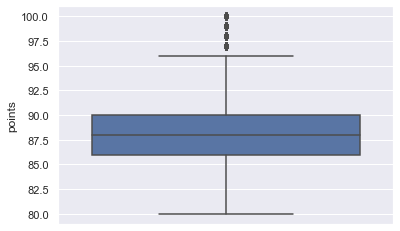

In [21]:
sns.set(style="darkgrid")
sns.boxplot(y='points',data=wine)
wine.points.describe()

葡萄酒平均得分为88.24分，可以认为：
优秀：90分及以上
良好：88.5~90分
一般：86~88.5分
较差：86分以下

`葡萄酒价格`

` 整体价格情况`

In [22]:
wine.price.describe()

count    156686.000000
mean         34.677878
std          39.941326
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

葡萄酒价格最大值为3300，属于极值情况，五点为4，16，25，40，3300

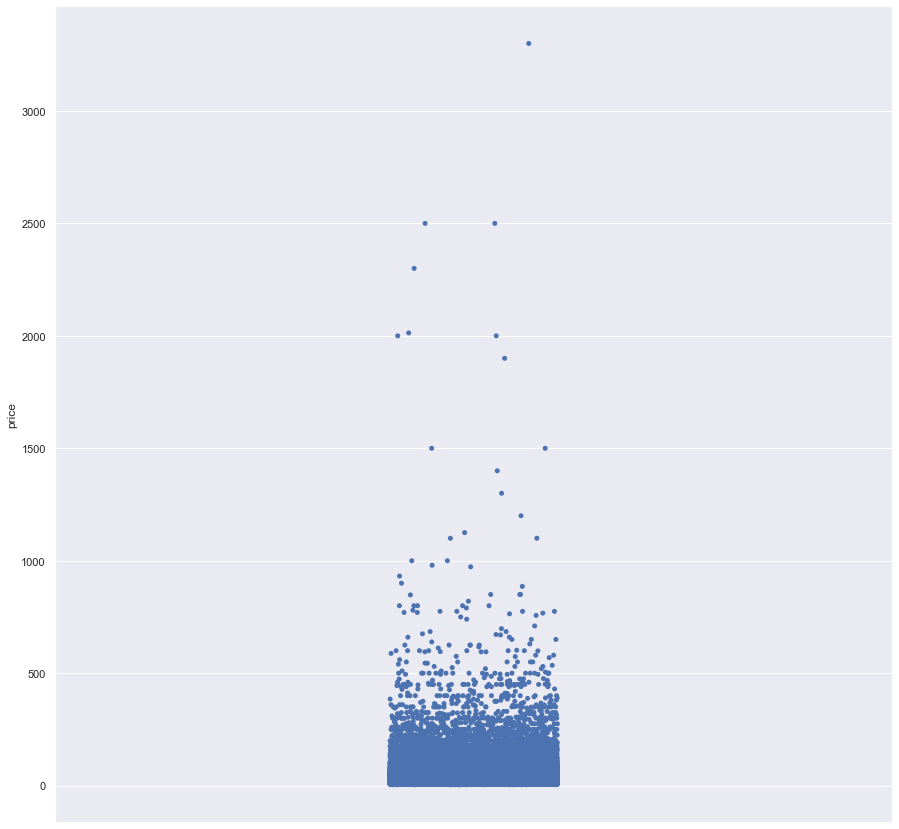

In [23]:

plt.figure(figsize=(15,15))
sns.stripplot(y='price',data=wine)

C:\Users\luzhe\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


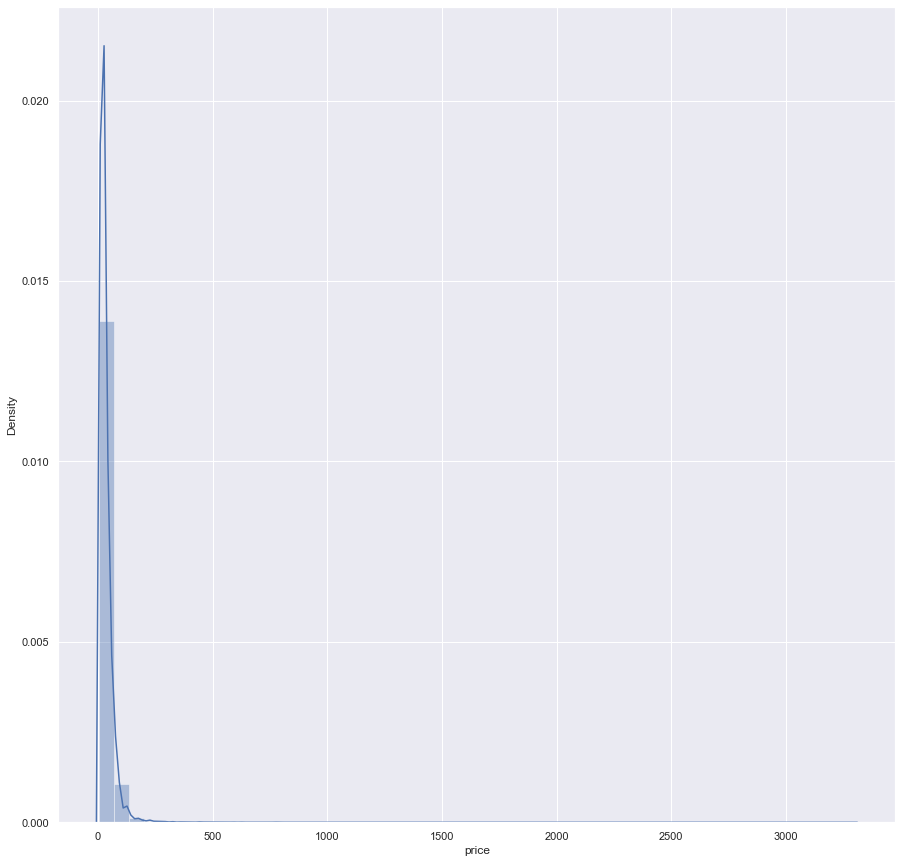

In [24]:
plt.figure(figsize=(15,15))
sns.distplot(wine.price.dropna())

根据葡萄酒的价格分布可知：
 葡萄酒价格一般在0~100之间，超过500以上的可认为是高端酒类，超过1000以上则是顶级奢华酒类。

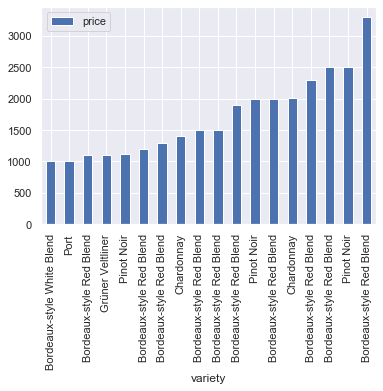

In [25]:
high_price=wine[wine.price>=1000][['country','province','designation','points','variety','price']].sort_values(by='price')
high_price.plot(kind='bar',x='variety',y='price')

可以得到以下结论：

    -最顶级的葡萄酒种类为：Bordeaux-style Red Blend、Pinot Noir、Chardonnay、Grüner Veltliner、Port和Bordeaux-style White Blend；

    -法国Bordeaux盛产顶级葡萄酒，主要是以Bordeaux命名的两类葡萄酒：Bordeaux-style Red Blend、Bordeaux-style White Blend；

    -顶级葡萄酒的评分除一项外均在90分以上，证明其品质优秀，一分钱一分货；
    
    -价格最高（3300）的葡萄酒评分反而低于90，一方面可能是其本身质量不够好，也有可能是因其定价远超出其质量导致了低分效应。


价格和评分的整体分布为：


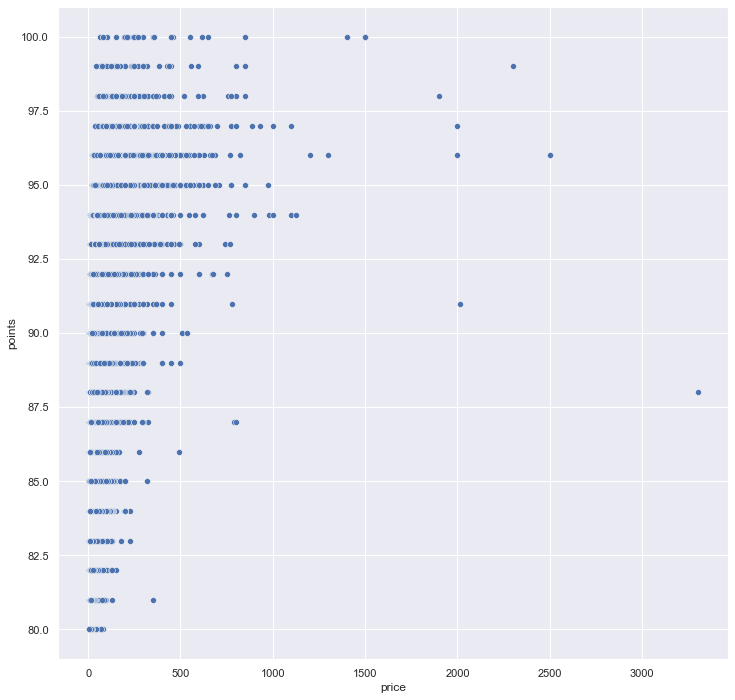

In [26]:

plt.figure(figsize=(12,12))
sns.scatterplot(x='price',y='points',data=wine)

In [27]:
a=wine[['points','price']].corr()
print('价格和评分的整体相关性系数为%.4f'%(a[0:1]['price']))
b=wine[wine.price<100][['points','price']].corr()
print('单价为100以下的葡萄酒价格和评分的相关性系数为%.4f'%(b[0:1]['price']))

价格和评分的整体相关性系数为0.4270
单价为100以下的葡萄酒价格和评分的相关性系数为0.5501


单价为100以下的葡萄酒价格和评分的相关性系数为 0.5501，可以认为价格和评分有一定的正相关关系；
单价在100以上后，价格和评分的相关性减弱，有可能是这些商品的定价因素有很多的其他附属价值，而不是单纯的葡萄酒质量。

`利用单价100以下的数据建立回归模型：`


<Figure size 864x864 with 0 Axes>

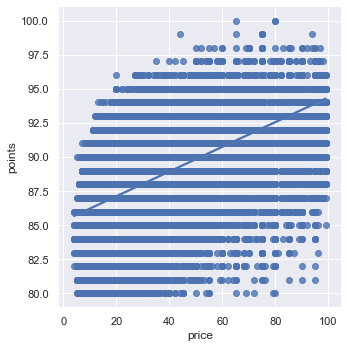

In [28]:
plt.figure(figsize=(12,12))
sns.lmplot(x='price',y='points',data=(wine[wine.price<100][['points','price']]))

In [32]:
# import sys
# !{sys.executable} -m pip install scikit-learn
from sklearn import linear_model #导入机器学习库中的线性回归方法
x=np.array(wine[wine.price<100]['price']).reshape(151617,1)
y=np.array(wine[wine.price<100]['points']).reshape(151617,1)
#建立回归模型
model=linear_model.LinearRegression()
model.fit(x,y)
#获取模型
coef=model.coef_ #获取自变量系数
model_intercept=model.intercept_#获取截距
R2=model.score(x,y) #R的平方
print('线性回归方程为：','\n','y=’{}*x+{}'.format(coef,model_intercept))

线性回归方程为： 
 y=’[[0.09049285]]*x+[85.31730978]


当葡萄酒的实际评分大于该模型反馈的评分时，可以认为该葡萄酒的性价比较高。

`品鉴师信息`

` 品鉴师总体情况`


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

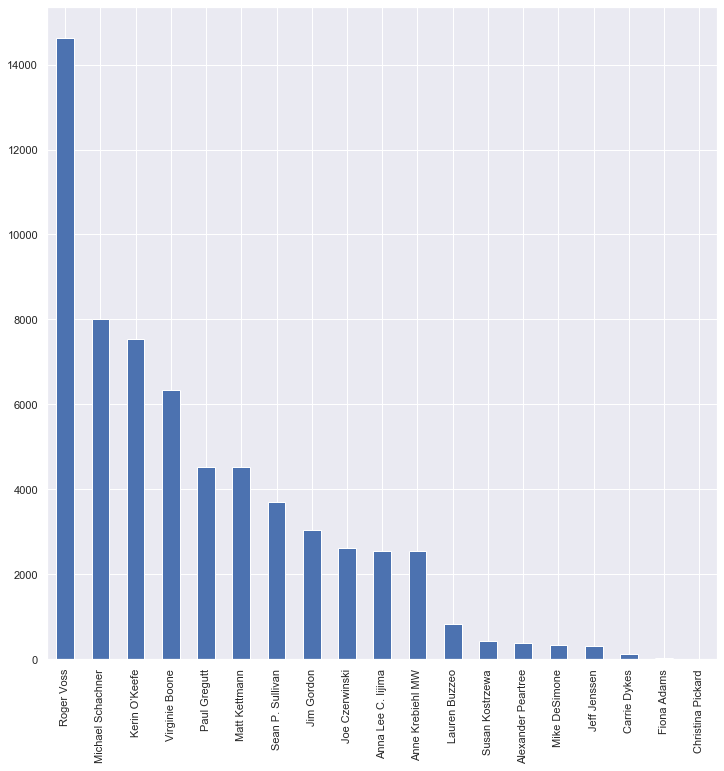

In [33]:
wine.taster_name.value_counts().plot(kind='bar',figsize=(12,12))
plt.xticks(rotation=90)

一共有19位品鉴师，其中Roger Voss、Michael Schachner、Kerin O’Keefe、Virginie Boone、Paul Gregutt等人是最资深的葡萄酒品鉴专家，并负责了市场上绝大部分的葡萄酒品鉴工作。



受到不同市场青睐的品鉴师

In [34]:
wine.groupby('taster_name').price.describe().sort_values(by='count',ascending=False)


,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Roger Voss,12235.0,38.493829,76.445324,5.0,15.00,22.0,40.0,3300.0
Michael Schachner,7894.0,25.691158,27.138138,4.0,13.00,18.0,27.0,600.0
Kerin O’Keefe,6902.0,41.923645,37.803933,7.0,20.00,30.0,50.0,595.0
Virginie Boone,6308.0,49.516328,34.949345,9.0,28.00,40.0,60.0,625.0
Paul Gregutt,4503.0,34.881412,20.062711,6.0,20.00,30.0,45.0,275.0
Matt Kettmann,4442.0,38.753940,21.029162,7.0,25.00,36.0,48.0,750.0
Sean P. Sullivan,3677.0,34.583900,20.477112,6.0,20.00,30.0,42.0,240.0
Jim Gordon,3042.0,26.750822,17.111999,4.0,15.00,23.0,32.0,220.0
Anna Lee C. Iijima,2533.0,30.277142,38.048627,6.0,16.00,22.0,34.0,775.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

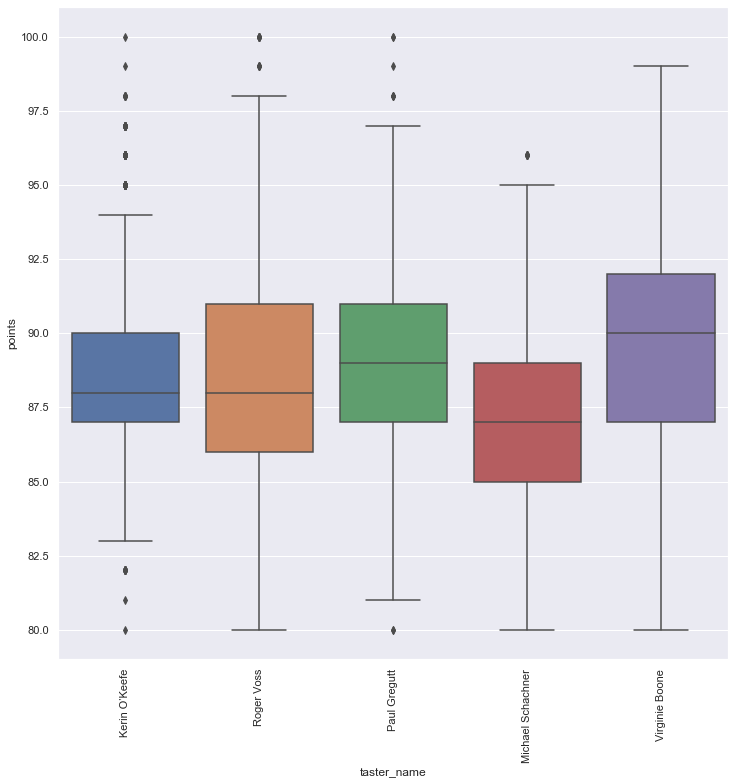

In [36]:

plt.figure(figsize=(12,12))
wine_taster=wine[(wine.taster_name=='Roger Voss')|(wine.taster_name=='Michael Schachner')|(wine.taster_name=='Kerin O’Keefe')|(wine.taster_name=='Virginie Boone')|(wine.taster_name=='Paul Gregutt')]
sns.boxplot(y='points',x='taster_name',data=wine_taster)
plt.xticks(rotation=90)


从表中数据可以看出：

    Roger Voss作为最资深的葡萄酒品鉴专家，品鉴种类相当广泛，涵盖低中高市场，同时拥有对最顶级奢华葡萄酒（价格为3300）的品鉴经验；

    Kerin O’Keefe和Virginie Boone则主要受到中高端葡萄酒商家的青睐，品鉴的葡萄酒均价为分别为41.9和49.5，评分也比较集中在一般和良好之间；

    Michael Schachner则主要瞄准中低端市场，品鉴的葡萄酒均价为25.69，相应的葡萄酒评分较低。
    
    Kerin O’Keefe和Virginie Boone同为中高端市场的品鉴专家，评分上面却存在较大差异，这可能是由于Kerin O’Keefe较为严苛所致，对此还可以进一步进行佐证的是：Paul Gregutt品鉴的葡萄酒价格整体较Kerin O’Keefe更低，但是整体评分却比Kerin O’Keefe的更高。



`品鉴师品鉴种类及联系方式概览`

In [42]:
#创建一个表，收集每个品鉴师品鉴最多的五个种类
temp=wine.groupby('taster_name').variety.value_counts().to_frame()
temp.columns=['num']
temp=temp.reset_index(level='variety')

taster_variety=pd.DataFrame()
for aaa in temp.index:
    taster_variety[aaa]=list(temp.loc[aaa].variety[0:5])
taster_variety=taster_variety.T
taster_variety=taster_variety.reset_index()
taster_variety.columns=[['taster_name','variety1','variety2','variety3','variety4','variety5']]

#创建一个表，收集品鉴师的联系方式，该表按照品鉴师资深程度排列
link=wine[['taster_name','taster_twitter_handle']].dropna().drop_duplicates()
namelist=list(wine.taster_name.value_counts().index)

name_link=pd.DataFrame(dict(zip(namelist,namelist)),index=['taster_twitter_handle'])
for aaa in namelist:
    if aaa in list(link.taster_name):
        name_link[aaa]=list(link[link.taster_name==aaa].taster_twitter_handle)[0]
    else:
        name_link[aaa]='@'
name_link=name_link.T.reset_index()
name_link.columns=[['taster_name','taster_twitter_handle']]

#联结两表
taster_info=pd.merge(name_link,taster_variety)
print(taster_info)

           taster_name taster_twitter_handle                  variety1  \
0           Roger Voss            @vossroger  Bordeaux-style Red Blend   
1    Michael Schachner           @wineschach                    Malbec   
2        Kerin O’Keefe          @kerinokeefe                 Red Blend   
3       Virginie Boone               @vboone                Pinot Noir   
4         Paul Gregutt           @paulgwine                 Pinot Noir   
5        Matt Kettmann         @mattkettmann                Pinot Noir   
6     Sean P. Sullivan         @wawinereport        Cabernet Sauvignon   
7           Jim Gordon      @gordone_cellars                Pinot Noir   
8       Joe Czerwinski                @JoeCz                Pinot Noir   
9   Anna Lee C. Iijima                     @                  Riesling   
10    Anne Krebiehl MW           @AnneInVino                  Riesling   
11       Lauren Buzzeo             @laurbuzz                      Rosé   
12     Susan Kostrzewa         @suskos

总结

    US、France、Italy、Spain都是葡萄酒大国，US无论是葡萄酒数量还是高性价比葡萄酒数量都稳居榜首，France擅产顶级奢侈葡萄酒，Italy把市场瞄准在中端市场，Spain的整体质量有待提高；

    数量最多的葡萄酒种类有Pinot Noir 、Chardonnay 、Cabernet Sauvignon等，其中最顶级的葡萄酒种类为：Bordeaux-style Red Blend、Pinot Noir、Chardonnay、Grüner Veltliner、Port和Bordeaux-style White Blend；

    葡萄酒描述关键词有：wine、aromas、Cabernet、blackberry、blend等，同时创建了不同种类葡萄酒的词频库，用户输入关键词，可以反馈适合的葡萄酒种类；
    
    葡萄酒品鉴师中，Roger Voss、Kerin O’Keefe、Virginie Boone和Michael Schachner都是资深的专家，面向的市场各有不同；同时创建了品鉴师名录，显示品鉴师联系方式，以及品鉴最多的五类葡萄酒。

